In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
 

In [18]:
X= np.random.rand(50,2)
Y= 2 + np.random.rand(50,2)
Z= np.concatenate((X,Y))
Z=pd.DataFrame(Z) #converting into data frame for ease

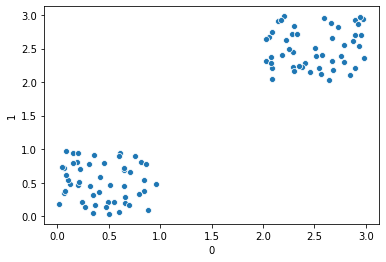

In [19]:
sns.scatterplot(Z[0],Z[1])

In [20]:
KMean= KMeans(n_clusters=2)
KMean.fit(Z)
label=KMean.predict(Z)
print(f'Silhouette Score(n=2): {silhouette_score(Z, label)}')

Silhouette Score(n=2): 0.8174385396125128


In [21]:
X = np.array(Z)


In [22]:
# See https://en.wikipedia.org/wiki/Silhouette_(clustering)

def calculate_a_i(inner_index_i, X, cluster_i, label):
    C_i = X[label == cluster_i]
    # sum_c_i = 0
    # for tt in range(len(C_i)):
    #     if tt != inner_index_i:
    #         sum_c_i += np.linalg.norm(C_i[inner_index_i]- C_i[tt])
    sum_c_i = sum([np.linalg.norm(C_i[inner_index_i] - tt) for tt in C_i])
    return  sum_c_i/(len(C_i) - 1)
 
def calculate_b_i(inner_index_i, X, cluster_i, label):
    C_i = X[label == cluster_i]
    X_i = C_i[inner_index_i]
    othter_cluster = [pp for pp in set(label) if pp != cluster_i]
    min_pool = []
    for kk in othter_cluster:
        C_j = X[label == kk]
        ttt = sum([np.linalg.norm(X_i - tt) for tt in C_j])/len(C_j)
        min_pool.append(ttt)
    return np.min(min_pool)
 
def calculate_s_i(inner_index_i, X, cluster_i, label):
    C_i = X[label == cluster_i]
    if len(C_i) == 1:
        s_i = 0
    else:
        a_ii = calculate_a_i(inner_index_i, X, cluster_i, label)
        b_ii = calculate_b_i(inner_index_i, X, cluster_i, label)
        s_i = (b_ii - a_ii)/np.max([b_ii,a_ii])
    return s_i
 
def silhouette_coefficient(X,label):
    all_clu = set(label)
    cal_mean = []
    for cluster_i in all_clu:
        X_I = X[label == cluster_i]
        for inner_index_i in range(len(X_I)):
            s_ii = calculate_s_i(inner_index_i, X, cluster_i, label)
            cal_mean.append(s_ii)
    return np.mean(cal_mean)

In [23]:
silhouette_score(X, label)

0.8174385396125128

In [24]:
silhouette_coefficient(X,label)

0.8174385396125128